# Data Collection and Preparation
Author: Alikhan Semembayev

In [36]:
with open("input.txt", 'r') as file:
    raw_text = file.read()

print(raw_text)

Jacob , you have the luxury of having a haircut that rarely needs styling . I don ’ t . I have to set aside about an hour and a half to get ready in the mornings . Every day , I wake up and head straight for the shower . Every second day , I wash my hair . If it ’ s a hair-washing day , I frequently need to wash my hair twice because it gets really oily . Then I usually put in a conditioner and have to rinse that out too . Because my hair is so long , I seldom manage to take a shower in under twenty minutes . Afterwards , I often put on a pot of coffee and get dressed while I wait for it to brew . I take a long time to get dressed in the morning . Every now and then I remember to choose my outfit the night before , but usually I do it in the morning . In all , getting dressed takes about half an hour , at which time my hair is now semi-dry so then I have to style my hair . From time to time I ’ ll put my hair up , but oftentimes I bloody it straight . And then , because of the texture 

## 1. Clean the data file by removing non-text (e.g. emojis, smart quotes) and regularizing text (e.g. tokenization, lower casing, stemming, lemmatizing, POS tagging, stop word removal, removing punctuation, spelling correction). Save the cleaned data in a txt file.  (70 points)

In [ ]:
import nltk

# Download necessary NLTK data (run once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

In [64]:
from collections import defaultdict
import demoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, wordnet
from nltk import pos_tag
from autocorrect import Speller

# Initialize tools
spell = Speller()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    # Replace emojis
    # text = demoji.replace_with_desc(text)
    text = demoji.replace(text, "")
    
    # Remove smart quotes and dashes
    text = text.replace("“", "\"").replace("”","\"").replace("-", " ")

    # Lowercase text
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)
    # print(words)
    
    # Spelling correction
    words = [spell(word) for word in words]

    # Remove stop words and non-alphabetic tokens and punctuation
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # words = [word for word in words if word.isalpha()]
    print(stop_words) # stop words include "not", "no", "don't" ... (e.g. I don't feel good => feel good)!!!!!!!!

    # Stemming (it's more fast but less accurate alternative to Lemmatization)
    # words = [stemmer.stem(word) for word in words]
    
    # POS tagging and Lemmatization
    tagged_words = pos_tag(words)
    
    tag_map = defaultdict(lambda: "n")
    tag_map["N"] = "n"
    tag_map["V"] = "v"
    tag_map["J"] = "a"
    tag_map["R"] = "r"
    
    words = [lemmatizer.lemmatize(word, pos=tag_map[tag[0]]) for word, tag in tagged_words]

    # Return cleaned words as a single string
    return ' '.join(words)

In [65]:
# Clean the text
cleaned_text = clean_text(raw_text)

# Save the cleaned data to a txt file
with open('cleaned_data.txt', 'w', encoding='utf-8') as cleaned_file:
    cleaned_file.write(cleaned_text)


{'doesn', 'both', "mustn't", 'further', 'at', 'shouldn', 'wasn', "mightn't", 'by', 'those', 'them', 'been', 'did', 'it', 'what', 'a', 'until', 'again', 'own', 'but', 'yourselves', 'our', 'ma', 'won', 'the', 'haven', 'their', 'because', 'aren', 's', 'shan', "didn't", "hadn't", 'do', 'am', 'during', 'theirs', 'then', "shan't", "won't", 'd', 'if', 'while', 'his', 'more', 'ain', 'now', 'will', 'whom', "hasn't", "should've", 'there', "it's", 'he', 'how', "haven't", 'other', 've', 'themselves', 'before', 'where', 'for', 'any', 'mustn', "you've", 'so', 'most', "aren't", 'wouldn', 'she', 'too', "don't", 'were', 'of', 'm', 'myself', 'her', 'was', 'does', "wouldn't", "needn't", "that'll", 'hadn', 'against', 'all', 'him', 'when', "you're", 'that', 'up', 'each', "she's", 'himself', 'itself', 'on', 'here', 'not', 'after', 'some', 'off', 'mightn', 'is', 'this', 'll', 'i', 'didn', 'hasn', 'same', 'above', 'ours', 'once', 'who', 'your', 'about', "shouldn't", 'and', 'out', "isn't", 're', "wasn't", 'suc

In [66]:
# Tokenize text
tokens = word_tokenize(cleaned_text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

## 2. Count word frequencies in the texts and save the result in a txt file.  (10 points)

In [67]:
from collections import Counter
# from nltk.probability import FreqDist

# Count word frequencies
# FreqDist(tokenized_text)
word_freq = Counter(tokens)

# Save word frequencies to a file
with open('word_frequencies.txt', 'w') as file:
    for word, freq in word_freq.items():
        file.write(f'{word}: {freq}\n')

print(word_freq)

Counter({'hair': 8, 'get': 5, 'time': 4, 'morning': 3, 'every': 3, 'day': 3, 'wash': 3, 'put': 3, 'take': 3, 'dress': 3, 'hour': 2, 'half': 2, 'straight': 2, 'shower': 2, 'usually': 2, 'long': 2, 'twenty': 2, 'minute': 2, 'jacob': 1, 'luxury': 1, 'haircut': 1, 'rarely': 1, 'needs': 1, 'styling': 1, 'set': 1, 'aside': 1, 'ready': 1, 'wake': 1, 'head': 1, 'second': 1, 'frequently': 1, 'need': 1, 'twice': 1, 'really': 1, 'oily': 1, 'conditioner': 1, 'rise': 1, 'seldom': 1, 'manage': 1, 'afterwards': 1, 'often': 1, 'pot': 1, 'coffee': 1, 'wait': 1, 'brew': 1, 'remember': 1, 'choose': 1, 'outfit': 1, 'night': 1, 'semi': 1, 'dry': 1, 'style': 1, 'oftentimes': 1, 'bloody': 1, 'texture': 1, 'regularly': 1, 'flat': 1, 'iron': 1, 'keep': 1, 'freeze': 1, 'another': 1, 'daily': 1, 'makeup': 1, 'routine': 1})


## 3. Displaying the most frequent 10 words and save the result as an image file.  (20 points)

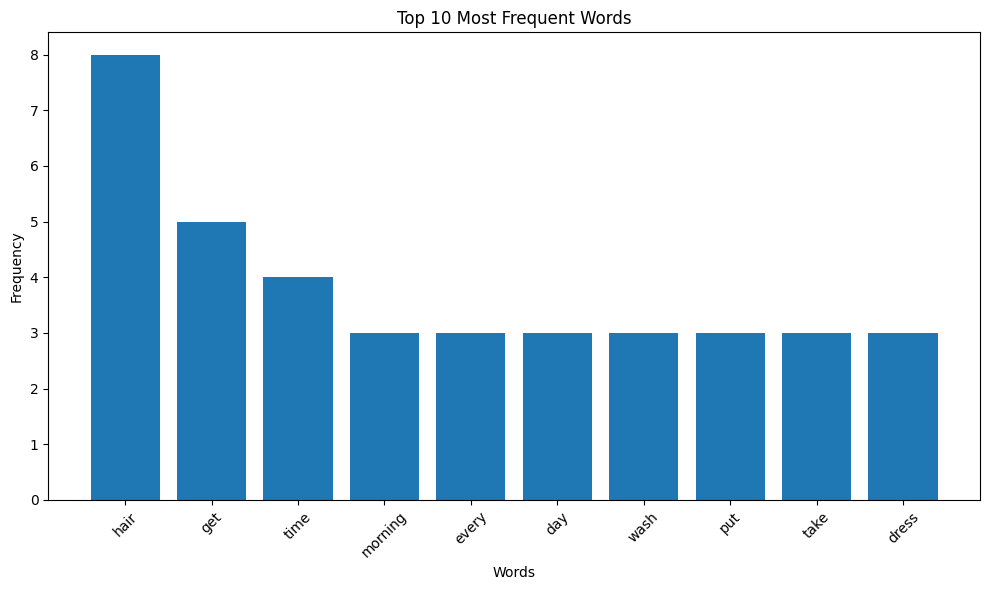

In [68]:
import matplotlib.pyplot as plt

# Get the most common 10 words
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('top_10_words.png')
plt.show()


## 4. Compute a word cloud from the word frequency distribution and save the result as an image file.  (20 points)


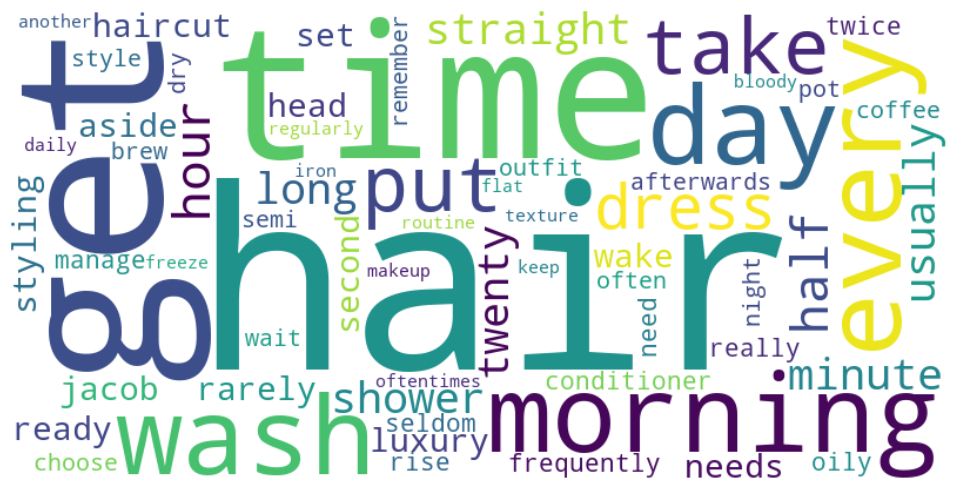

In [69]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot and save the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.savefig('word_cloud.png')
plt.show()


## 5. Display the frequencies of the parts of speech and save the result as an image file.  (20 points)

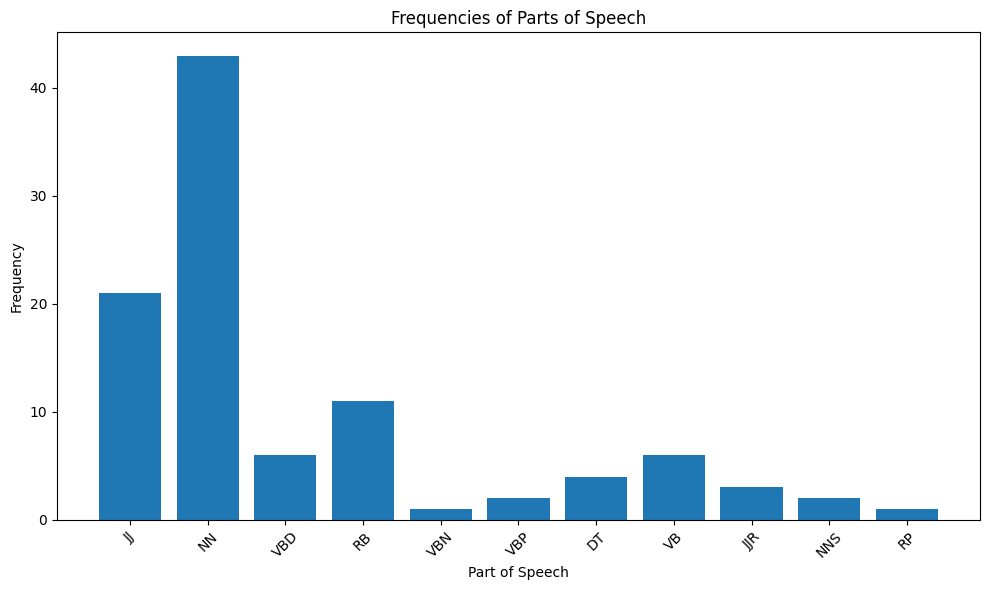

In [70]:
from collections import Counter

# Count POS frequencies
pos_freq = Counter(tag for word, tag in pos_tags)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Frequencies of Parts of Speech')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('pos_frequencies.png')
plt.show()
